In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from statistics import mean
from functools import reduce
import math

In [2]:
file = pd.ExcelFile("data.xlsx")

In [3]:
I_2 = file.parse(sheet_name = 'Лист1', header=0, usecols='A').values.flatten() #A
I_2_error = 0.01 #А
Am_2 = file.parse(sheet_name = 'Лист1', header=0, usecols='B').values.flatten()
Am_2_error = 0.1

In [4]:
file = pd.ExcelFile("data_2.xlsx")

In [5]:
F_1 = file.parse(sheet_name = 'Лист1', header=0, usecols='B').values.flatten() #Гц
F_1_error = 0.1
Am_1 = file.parse(sheet_name = 'Лист1', header=0, usecols='A').values.flatten()
Am_1_error = 0.1

Строим зависимость амплитуды от частоты, чтобы найти оптимальную частоту, соответствующую максимальной амплитуде

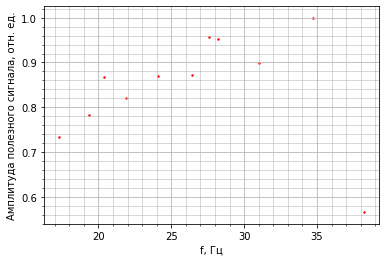

In [15]:
fig, ax = plt.subplots()
Am_1_max = max(Am_1)
Am_1_new = [Am_1[i]/Am_1_max for i in range (len(Am_1))]

plt.scatter(F_1, Am_1_new, color = 'red', s = 2)
#plt.errorbar(F_1, Am_1_new, yerr = F_1_error, xerr = Am_1_error,fmt='none',ecolor = 'black',elinewidth = 1)

plt.grid(True)
ax.minorticks_on()
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('Амплитуда полезного сигнала, отн. ед.')
ax.set_xlabel('f, Гц')
plt.show()
fig.savefig('Am(f)_Kate.png', dpi = 1000)

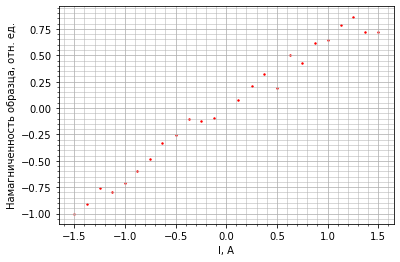

In [12]:
fig, ax = plt.subplots()
Am_2_abs = [abs(Am_2[i]) for i in range (len(Am_2))]
Am_2_max = max(Am_2_abs)
Am_2_new = [Am_2[i]/Am_2_max for i in range (len(Am_2))]

plt.scatter(I_2, Am_2_new, color = 'red', s = 2)
#plt.errorbar(I_2, Am_2_new, yerr = F_1_error, xerr = Am_1_error,fmt='none',ecolor = 'black',elinewidth = 1)

plt.grid(True)
ax.minorticks_on()
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('Намагниченность образца, отн. ед.')
ax.set_xlabel('I, A')
plt.show()
fig.savefig('Am(I)_Kate.png', dpi = 1000)

In [18]:
#Выгрузить данные в эксель

from pandas import DataFrame
df = DataFrame({'I': I_2,'Am_2': Am_2_new})
df.to_excel('scint.xlsx', sheet_name='Лист1', index=False)

In [16]:
#Выгрузить данные в эксель

from pandas import DataFrame
df = DataFrame({'Am_1': Am_1_new, 'F_1': F_1})
df.to_excel('scint_1.xlsx', sheet_name='Лист1', index=False)